In [1]:
import torch
import matplotlib.pyplot as plt

## Callbacks

### Example: Callbacks as GUI events

From the [ipywidget docs](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html)

In [2]:
import ipywidgets as widgets

In [3]:
def f(o): print('hi')

In [4]:
w = widgets.Button(description='Click me')

In [5]:
w # won't work until you run the on_click method and pass it function f

Button(description='Click me', style=ButtonStyle())

In [6]:
w.on_click(f) # f is a calback - we're passing the function itself to this method, which callsback when you click the button!

### Creating your own callback

Let's create a callback, and the event it's going to callback on is after a calculation is complete. So, we first create a function - slow calculation. It's going to do five calculations - adds i squared and then takes a second to sleep.

In [7]:
from time import sleep

In [8]:
def slow_calculation():
    res = 0
    for i in range(5):
        res += i*i
        sleep(1)
    return res

In [9]:
slow_calculation()

30

So if we wanted to know what the progress of this slow calculation is like, we could take the function and add a callback that we pass in. 

In [10]:
def slow_calculation(cb=None): # passing in our callback
    res = 0
    for i in range(5):
        res += i*i
        sleep(1)
        if cb: cb(i) # if there's a callback, call it, and please pass in the epoch number
        # so the callback itself is a function, and you're passing it a value 
        # i is what we're passing to the callback function
    return res

In [11]:
def show_progress(epoch):
    print(f"Awesome! We've finished epoch {epoch}!") # this is parameter i from the main function
    # will callback to our function after each epoch!

In [12]:
slow_calculation(show_progress)

Awesome! We've finished epoch 0!
Awesome! We've finished epoch 1!
Awesome! We've finished epoch 2!
Awesome! We've finished epoch 3!
Awesome! We've finished epoch 4!


30

### Lambdas and partials

Rather than defining a function just for the purpose of using it once (```def show_progress```), let's define the function at the point we use it using Lambda notation.

Substitute def with lambda, define the function at the point we are actually using it (inside the main function)

So lamba notation is just another way of creating a function!

Instead of def, use lambda, and instead of putting the arguments in parentheses, we put the arguments before a colon.

Identical to the previous method, but it's convenient for when you want to define the callback at the same time that you use it, to make you code a bit more concise.

In [13]:
slow_calculation(lambda o: print(f"Awesome! We've finished epoch {o}!"))

Awesome! We've finished epoch 0!
Awesome! We've finished epoch 1!
Awesome! We've finished epoch 2!
Awesome! We've finished epoch 3!
Awesome! We've finished epoch 4!


30

In [14]:
def show_progress(exclamation, epoch):
    print(f"{exclamation}! We've finished epoch {epoch}!")

In [15]:
slow_calculation(show_progress)

# why can't we do this?
# we have two arguments now, only one, and the main function provides only one (epoch)

TypeError: show_progress() missing 1 required positional argument: 'epoch'

In [16]:
slow_calculation(lambda o: show_progress("OK I guess", o)) 
# so let's convert this to a function with only one argument 

# lambda o is a function with only one argument, and it calls show_progress with an exclamation (it's calling show_progress that contains exclamations)

OK I guess! We've finished epoch 0!
OK I guess! We've finished epoch 1!
OK I guess! We've finished epoch 2!
OK I guess! We've finished epoch 3!
OK I guess! We've finished epoch 4!


30

Might want to make it really easy to have users make their own progress bars

make_show_progress will return lambda

Pass in to make_show_progress something that you want to exclaim
Remember it's actually taking two args because the lamda function within make_show_progress is being called, and this lambda function is the true callback which is receiving the "i" argument from within slow_calculation

In [17]:
def make_show_progress(exclamation):
    _inner = lambda epoch: print(f"{exclamation}! We've finished epoch {epoch}!")
    return _inner

In [18]:
slow_calculation(make_show_progress("Nice!"))

Nice!! We've finished epoch 0!
Nice!! We've finished epoch 1!
Nice!! We've finished epoch 2!
Nice!! We've finished epoch 3!
Nice!! We've finished epoch 4!


30

In [19]:
def make_show_progress(exclamation):
    # Leading "_" is generally understood to be "private"
    # now exclamation var is private to the new function within the external function
    # When you create a function that stores info from external context and it can be different everytime, this is a closure
    def _inner(epoch): print(f"{exclamation}! We've finished epoch {epoch}!")
    return _inner

In [20]:
slow_calculation(make_show_progress("Nice!"))

Nice!! We've finished epoch 0!
Nice!! We've finished epoch 1!
Nice!! We've finished epoch 2!
Nice!! We've finished epoch 3!
Nice!! We've finished epoch 4!


30

In [21]:
f2 = make_show_progress("Terrific") # contains closure - we can do something different everytime 

In [22]:
slow_calculation(f2) # f2 is a function containing new arg "Terrific"

Terrific! We've finished epoch 0!
Terrific! We've finished epoch 1!
Terrific! We've finished epoch 2!
Terrific! We've finished epoch 3!
Terrific! We've finished epoch 4!


30

In [23]:
slow_calculation(make_show_progress("Amazing"))

Amazing! We've finished epoch 0!
Amazing! We've finished epoch 1!
Amazing! We've finished epoch 2!
Amazing! We've finished epoch 3!
Amazing! We've finished epoch 4!


30

In [24]:
from functools import partial # partial function application
# if you call partial, pass it a function and some arguments for that function, 
# returns a new function where that parameter is always a given

In [25]:
slow_calculation(partial(show_progress, "OK I guess"))

OK I guess! We've finished epoch 0!
OK I guess! We've finished epoch 1!
OK I guess! We've finished epoch 2!
OK I guess! We've finished epoch 3!
OK I guess! We've finished epoch 4!


30

In [26]:
f2 = partial(show_progress, "OK I guess")

In [27]:
f2(1) # this is a new functions which just takes epoch
# can check with shift tab

OK I guess! We've finished epoch 1!


### Callbacks as callable classes

You can also use classes (as opposed to functions) as a callback!

Anywhere you can use a closure you can also use a class. Instead of storing it away inside state, can store it inside self and pass it into init

```__call__``` is a special name that will be called if you take an object (progress showing cb) and call it with parenthesis

In [28]:
class ProgressShowingCallback():
    def __init__(self, exclamation="Awesome"): self.exclamation = exclamation
    def __call__(self, epoch): print(f"{self.exclamation}! We've finished epoch {epoch}!")

In [29]:
cb = ProgressShowingCallback("Just super") # argument passsed to __init__ ; this passes in "just super" as the exclamation arg

In [33]:
cb("test!") # __call__ makes it so that I can treat this class object as a function - passing in the argument "epoch"

Just super! We've finished epoch test!!


In [34]:
slow_calculation(cb)

Just super! We've finished epoch 0!
Just super! We've finished epoch 1!
Just super! We've finished epoch 2!
Just super! We've finished epoch 3!
Just super! We've finished epoch 4!


30

### Multiple callback funcs; `*args` and `**kwargs`

In [35]:
def f(*args, **kwargs): print(f"args: {args}; kwargs: {kwargs}")

In [ ]:
# This is the same as pytorch nn.sequential
# when you pass in things, passes these in as *args and turns it into a tuple
# Why use this? If you want to wrap some other class or object, take stuff as **kwargs and pass it off to some other class or object

In [36]:
f(3, 'a', thing1="hello") # all things that are passed as positional arguments go into a tuple called args
# all things that are passed as keyword arguments end up formatted as a dictionary called kwargs 

args: (3, 'a'); kwargs: {'thing1': 'hello'}


Can be annoying for the end-user unless care is taken to ensure docs show all kwargs too. (shift tab will reveal all args but not necessarily kwargs)

In [37]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        if cb: cb.before_calc(i) #before cal only takes on positional arg
        res += i*i
        sleep(1)
        if cb: cb.after_calc(i, val=res) #after cal takes both a positional arg and a kwarg
    return res

In [38]:
class PrintStepCallback():
    def __init__(self): pass
    def before_calc(self, *args, **kwargs): print(f"About to start")
    def after_calc (self, *args, **kwargs): print(f"Done step")
        
    # in this case, this callback didn't actually worry about the epoch number or about the value
    # just has *args and **kwargs in place, doesn't have to worry about not actually using them (used here as placeholders)

In [39]:
slow_calculation(PrintStepCallback())

About to start
Done step
About to start
Done step
About to start
Done step
About to start
Done step
About to start
Done step


30

In [40]:
class PrintStatusCallback():
    def __init__(self): pass
    def before_calc(self, epoch, **kwargs): print(f"About to start: {epoch}")
    def after_calc (self, epoch, val, **kwargs): print(f"After {epoch}: {val}")
        
    # putting **kwargs in place here means that you could pass in other things in the future, and it won't break 
    # makes your code more resilient against changes that you may want to incorporate in the future

In [41]:
slow_calculation(PrintStatusCallback())

About to start: 0
After 0: 0
About to start: 1
After 1: 1
About to start: 2
After 2: 5
About to start: 3
After 3: 14
About to start: 4
After 4: 30


30

### Modifying behavior

In [42]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        if cb and hasattr(cb,'before_calc'): cb.before_calc(i)
        res += i*i
        sleep(1)
        if cb and hasattr(cb,'after_calc'):
            if cb.after_calc(i, res):
                print("stopping early")
                break
    return res

# what if you don't want to define both before and after calc?
# here, checking if before calc is defined, otherwise goes on
# checking for after calc, has after calc and so runs it after calculation has finished

In [43]:
class PrintAfterCallback():
    def after_calc (self, epoch, val):
        print(f"After {epoch}: {val}")
        if val>10: return True

In [44]:
slow_calculation(PrintAfterCallback())

After 0: 0
After 1: 1
After 2: 5
After 3: 14
stopping early


14

### Below is the ultimately most flexible callback method of all the ones demonstrated

In [47]:
# change the way the calc is being done
# take calc func, put into class, value that's calced is attr of class
# callback reaches back inside the calculator and changes it

class SlowCalculator():
    def __init__(self, cb=None): self.cb,self.res = cb,0
    # self.cb is our callback, an attribute of the slowcalculator class, we call it cb
    # self.res is the value we start off with, which we define as zero
    def callback(self, cb_name, *args): # this is a class object for whatever callback class you define later and want to use to modify calc
        if not self.cb: return 
        cb = getattr(self.cb,cb_name, None) # if no cb, positional arg is None
        if cb: return cb(self, *args) # if cb, self and positional args of callback 
    
    # cb is now ready to go as the callback class

    def calc(self):
        for i in range(5):
            self.callback('before_calc', i)
            self.res += i*i # the value we're calculating is now an attribute of the calc class
            sleep(1)
            if self.callback('after_calc', i):
                print("stopping early")
                break

### This is exactly the same, except instead of def callback, we use ```__call__```, and then don't need self.callback, just self when getting the callback

In [51]:
class SlowCalculator():
    def __init__(self, cb=None): self.cb,self.res = cb,0
    
    def __call__(self, cb_name, *args): # this is a class object for whatever callback class you define later and want to use to modify calc
        if not self.cb: return 
        cb = getattr(self.cb,cb_name, None) # if no cb, positional arg is None
        if cb: return cb(self, *args) # if cb, self and positional args of callback 
    
    
    def calc(self):
        for i in range(5):
            self('before_calc', i)
            self.res += i*i # the value we're calculating is now an attribute of the calc class
            sleep(1)
            if self('after_calc', i):
                print("stopping early")
                break

In [48]:
class ModifyingCallback():
    def after_calc (self, calc, epoch):
        print(f"After {epoch}: {calc.res}")
        if calc.res>10: return True
        if calc.res<3: calc.res = calc.res*2

In [49]:
calculator = SlowCalculator(ModifyingCallback())

In [50]:
calculator.calc() # have to call the method because SlowCalculator is a class, call 'calc'
calculator.res # print out the last value that we obtained from calc

After 0: 0
After 1: 1
After 2: 6
After 3: 15
stopping early


15

## `__dunder__` thingies

Anything that looks like `__this__` is, in some way, *special*. Python, or some library, can define some functions that they will call at certain documented times. For instance, when your class is setting up a new object, python will call `__init__`. These are defined as part of the python [data model](https://docs.python.org/3/reference/datamodel.html#object.__init__).

For instance, if python sees `+`, then it will call the special method `__add__`. If you try to display an object in Jupyter (or lots of other places in Python) it will call `__repr__`.

In [ ]:
class SloppyAdder():
    def __init__(self,o): self.o=o # __init__ is an object constructor
    def __add__(self,b): return SloppyAdder(self.o + b.o + 0.01) # it will give you the result of adding these two things,
    # BUT it will be wrong by 0.01!!
    def __repr__(self): return str(self.o) # __repr__ gets called when you want to pritn something

In [ ]:
a = SloppyAdder(1)
b = SloppyAdder(2)
a+b

3.01

Special methods you should probably know about (see data model link above) are:

- `__getitem__`
- `__getattr__`
- `__setattr__`
- `__del__`
- `__init__`
- `__new__`
- `__enter__`
- `__exit__`
- `__len__`
- `__repr__`
- `__str__`

## Browsing source code tips

- Jump to tag/symbol by with (with completions)
- Jump to current tag
- Jump to library tags
- Go back
- Search
- Outlining / folding

# Mathy stuff

### Variance

Variance is the average of how far away each data point is from the mean. E.g.:

In [65]:
t = torch.tensor([1.,2.,4.,18])

In [66]:
j = 1-6.25
k = 2-6.25
l = 4-6.45
m = 18-6.25

In [67]:
j,k,l,m

(-5.25, -4.25, -2.45, 11.75)

In [69]:
m = t.mean(); m

tensor(6.2500)

In [70]:
(t-m).mean()

tensor(0.)

Oops. We can't do that. Because by definition the positives and negatives cancel out. So we can fix that in one of (at least) two ways:

In [55]:
(t-m).pow(2).mean()

tensor(47.1875)

In [56]:
(t-m).abs().mean() # mean absolute deviation - more useful for machine learning because we care way more about outliers

tensor(5.8750)

But the first of these is now a totally different scale, since we squared. So let's undo that at the end.

In [57]:
(t-m).pow(2).mean().sqrt() # this is the standard deviation, which is the square root of the variance

tensor(6.8693)

They're still different. Why?

Note that we have one outlier (`18`). In the version where we square everything, it makes that much bigger than everything else.

`(t-m).pow(2).mean()` is refered to as **variance**. It's a measure of how spread out the data is, and is particularly sensitive to outliers.

When we take the sqrt of the variance, we get the **standard deviation**. Since it's on the same kind of scale as the original data, it's generally more interpretable. However, since `sqrt(1)==1`, it doesn't much matter which we use when talking about *unit variance* for initializing neural nets.

`(t-m).abs().mean()` is referred to as the **mean absolute deviation**. It isn't used nearly as much as it deserves to be, because mathematicians don't like how awkward it is to work with. But that shouldn't stop us, because we have computers and stuff.

Here's a useful thing to note about variance:

In [71]:
(t-m).pow(2).mean(), (t*t).mean() - (m*m) # these are the same
# these are two ways of writing the variance

(tensor(47.1875), tensor(47.1875))

You can see why these are equal if you want to work thru the algebra. Or not.

But, what's important here is that the latter is generally much easier to work with. In particular, you only have to track two things: the sum of the data, and the sum of squares of the data. Whereas in the first form you actually have to go thru all the data twice (once to calculate the mean, once to calculate the differences).

Let's go steal the LaTeX from [Wikipedia](https://en.wikipedia.org/wiki/Variance):

$$\operatorname{E}\left[X^2 \right] - \operatorname{E}[X]^2$$

### Covariance and correlation

Here's how Wikipedia defines covariance:

$$\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]}$$

In [81]:
t

tensor([ 1.,  2.,  4., 18.])

Let's see that in code. So now we need two vectors.

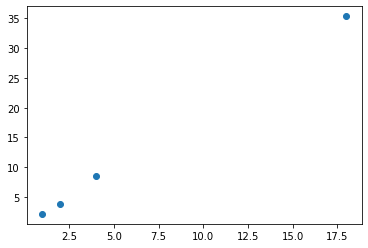

In [82]:
# `u` is twice `t`, plus a bit of randomness
u = t*2
u *= torch.randn_like(t)/10+0.95

plt.scatter(t, u);

In [83]:
prod = (t-t.mean())*(u-u.mean()); prod

tensor([ 54.2276,  36.6461,   8.8517, 268.9075])

In [84]:
prod.mean()

tensor(92.1582)

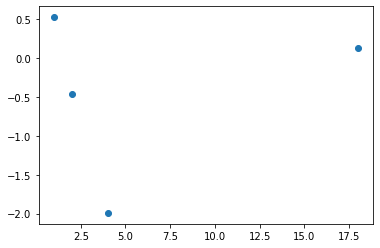

In [85]:
v = torch.randn_like(t)
plt.scatter(t, v);

In [87]:
((t-t.mean())*(v-v.mean())).mean() 

# this number is much smaller, why??
# these are measures of how lined up with one another
# when x is big, y isn't necessarily big - thus, small number!


tensor(1.2917)

It's generally more conveniently defined like so:

$$\operatorname{E}\left[X Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right]$$

In [88]:
cov = (t*v).mean() - t.mean()*v.mean(); cov # how things vary linearly

# if you want to know how things vary non-linearly ...
# have to create a neural network, and check your loss!

tensor(1.2917)

From now on, you're not allowed to look at an equation (or especially type it in LaTeX) without also typing it in Python and actually calculating some values. Ideally, you should also plot some values.

Finally, here is the Pearson correlation coefficient:

$$\rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}$$

In [ ]:
cov / (t.std() * v.std())

tensor(0.2978)

It's just a scaled version of the same thing. Question: *Why is it scaled by standard deviation, and not by variance or mean or something else?*

## Softmax

Here's our final `logsoftmax` definition:

In [ ]:
def log_softmax(x): return x - x.exp().sum(-1,keepdim=True).log()

which is:

$$\hbox{logsoftmax(x)}_{i} = x_{i} - \log \sum_{j} e^{x_{j}}$$ 

And our cross entropy loss is:
$$-\log(p_{i})$$

### When should you (and shouldn't you) use Softmax?

Your activations may have the same log ratio and therefore the same softmax value, even if the activations were actually very far apart from one another. Why? What if you have none of your categories in an image? 

Say you have a blank image, with nothing in it.

Softmax has to pick something to go off of, and so it will pick something at random. And anything that is high relative to the other activations will be pushed much higher, because it's exponential. So, softmax likes to pick one thing and make it big.

Or, maybe an image has three of the objects you're trying to classify - but because softmax must add to one, one of them is going to be much bigger than the others ... 

This will spit out that the two outcomes have a nearly equal probability for a particular category, however, this isn't the reality of what's going on!

**So, softmax is a bad idea UNLESS you ARE ABSOLUTELY SURE that every piece of data you're inputing has NO MORE THAN ONE, ONLY ONE, AND AT LEAST ONE, of the thing you care about.**

### What can we do if there's a chance we have no things or more than one things in our data we're classifying?

Instead - use binomial!

$$e^x / (1 + e^x)$$

EXACTLY the same as softmax if your two categories are 
- has the thing 

and

- doesn't have the thing

Better for **multi-label classification**

### So why do we tend to use Softmax all the time?

Because most of the things we use were trained on ImageNet - and ImageNet was specifically designed so that every image has only one and exactly one of the thing we're trying to classify!

Another work around - could create another category just called Null or missing. However, this doesn't work!
They're are no set of features that represent a "not" something.

### Lots of academic papers make this mistake, so be on the look out for it!

So if you find something and they use softmax, and you wonder why they used it, replicate it without softmax - might get a better result!

### Softmax is a good idea for ... language modeling

What's the next word? Definitely at least one word, and not more than one word.

### So before using softmax, ask yourself - Is there at least one of the things I want always? And if so, is there ever a possibility that there are more than one of the things I want.

- If there's at least one and always one - good to use!
- If there's sometimes none or more than one - bad to use!